# this need a good code base for EDA


In [2]:

import numpy as np
import pandas as pd
import pycaret
import seaborn as sns
from pycaret.clustering import *
from pycaret.clustering import ClusteringExperiment
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn import tree


import warnings
warnings.filterwarnings("ignore")


# Demographic Analysis Of the States


In [61]:
FirstDataset = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv")

FirstDataset


,Rank,State,Postal,Population
0,1,Alabama,AL,4849377.0
1,2,Alaska,AK,736732.0
2,3,Arizona,AZ,6731484.0
3,4,Arkansas,AR,2966369.0
4,5,California,CA,38802500.0
5,6,Colorado,CO,5355866.0
6,7,Connecticut,CT,3596677.0
7,8,Delaware,DE,935614.0
8,9,District of Columbia,DC,658893.0
9,10,Florida,FL,19893297.0


In [62]:
# label encoding the sname and cityname

from sklearn import preprocessing

label_encoding_features = preprocessing.LabelEncoder()
FirstDataset['State'] = label_encoding_features.fit_transform(
    FirstDataset['State'])

label_encoding_features = preprocessing.LabelEncoder()
FirstDataset['Postal'] = label_encoding_features.fit_transform(
    FirstDataset['Postal'])


In [63]:
FirstDataset


,Rank,State,Postal,Population
0,1,0,1,4849377.0
1,2,1,0,736732.0
2,3,2,3,6731484.0
3,4,3,2,2966369.0
4,5,4,4,38802500.0
5,6,5,5,5355866.0
6,7,6,6,3596677.0
7,8,7,8,935614.0
8,9,8,7,658893.0
9,10,9,9,19893297.0


In [85]:
FirstDataset = FirstDataset.sort_values(by="Population")
FirstDataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 51 to 4
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        52 non-null     int64  
 1   State       52 non-null     int32  
 2   Postal      52 non-null     int32  
 3   Population  52 non-null     float64
 4   e           52 non-null     float64
dtypes: float64(2), int32(2), int64(1)
memory usage: 2.0 KB


### Plotly Visualization


In [67]:
import plotly.express as px
fig = px.bar(FirstDataset, x="Population", y="Postal", orientation='h')
fig.show()


## Scatter Plots on the Data


In [68]:
import plotly.express as px
fig = px.scatter(FirstDataset, x="Population", y="Postal")
fig.show()


In [69]:
# error bar
import plotly.express as px

FirstDataset["e"] = FirstDataset["Population"]/100
fig = px.scatter(FirstDataset, x="Population", y="Postal", color="Rank",
                 error_x="e", error_y="e")
fig.show()


In [70]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=go.Scatter(
    y=FirstDataset["Population"],
    mode='markers',
    marker=dict(
        size=16,
        color=np.random.randn(500),  # set color equal to a variable
        colorscale='Viridis',  # one of plotly colorscales
        showscale=True
    )
))

fig.show()


In [81]:


fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=FirstDataset["Population"], y=FirstDataset["Postal"],
                         mode='markers',
                         name='markers'))
fig.add_trace(go.Scatter(x=FirstDataset["Population"], y=FirstDataset["Postal"],
                         mode='lines+markers',
                         name='lines+markers'))
fig.add_trace(go.Scatter(x=FirstDataset["Population"], y=FirstDataset["Postal"],
                         mode='lines',
                         name='lines'))

fig.show()


### Regression on the First dataset


In [86]:


import plotly.express as px

fig = px.scatter(FirstDataset, x="Population", y="Postal", trendline="ols")
fig.show()


## All the relevant plotly visualzations


## 3D plot of ploty for Clustering


In [5]:
Second_Dataset = pd.read_csv("./minoritymajority.csv")
Second_Dataset


,FIPS,STNAME,CTYNAME,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,NHWA_MALE,NHWA_FEMALE,NHWhite_Alone,Not_NHWhite_Alone,MinorityMinority,MinorityPCT,Black,BlackPCT,Hispanic,HispanicPCT
0,18049,Indiana,Fulton County,20737,10369,10368,9985,10020,9561,9627,19188,1549,No,7.47%,170,1%,965,4.65%
1,18051,Indiana,Gibson County,33458,16642,16816,15873,16117,15648,15955,31603,1855,No,5.54%,667,2%,476,1.42%
2,18053,Indiana,Grant County,69330,33282,36048,29587,32460,28353,31398,59751,9579,No,13.82%,4936,7%,2656,3.83%
3,18055,Indiana,Greene County,32940,16479,16461,16179,16167,16029,15999,32028,912,No,2.77%,82,0%,351,1.07%
4,18057,Indiana,Hamilton County,289495,141103,148392,125675,131785,120979,127105,248084,41411,No,14.30%,11332,4%,10548,3.64%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,18043,Indiana,Floyd County,75283,36510,38773,33379,35523,32342,34694,67036,8247,No,10.95%,3892,5%,2162,2.87%
3139,18045,Indiana,Fountain County,17119,8520,8599,8364,8421,8180,8251,16431,688,No,4.02%,66,0%,392,2.29%
3140,18047,Indiana,Franklin County,22969,11475,11494,11311,11318,11210,11221,22431,538,No,2.34%,64,0%,225,0.98%
3141,35011,New Mexico,De Baca County,1927,956,971,897,931,545,573,1118,809,No,41.98%,6,0%,758,39.34%


In [6]:
# label encoding all of these
from sklearn import preprocessing

label_encoding_features = preprocessing.LabelEncoder()
Second_Dataset['STNAME'] = label_encoding_features.fit_transform(
    Second_Dataset['STNAME'])

label_encoding_features = preprocessing.LabelEncoder()
Second_Dataset['CTYNAME'] = label_encoding_features.fit_transform(
    Second_Dataset['CTYNAME'])

label_encoding_features = preprocessing.LabelEncoder()
Second_Dataset['MinorityMinority'] = label_encoding_features.fit_transform(
    Second_Dataset['MinorityMinority'])


In [7]:
Second_Dataset


,FIPS,STNAME,CTYNAME,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,NHWA_MALE,NHWA_FEMALE,NHWhite_Alone,Not_NHWhite_Alone,MinorityMinority,MinorityPCT,Black,BlackPCT,Hispanic,HispanicPCT
0,18049,14,612,20737,10369,10368,9985,10020,9561,9627,19188,1549,0,7.47%,170,1%,965,4.65%
1,18051,14,639,33458,16642,16816,15873,16117,15648,15955,31603,1855,0,5.54%,667,2%,476,1.42%
2,18053,14,675,69330,33282,36048,29587,32460,28353,31398,59751,9579,0,13.82%,4936,7%,2656,3.83%
3,18055,14,687,32940,16479,16461,16179,16167,16029,15999,32028,912,0,2.77%,82,0%,351,1.07%
4,18057,14,714,289495,141103,148392,125675,131785,120979,127105,248084,41411,0,14.30%,11332,4%,10548,3.64%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,18043,14,590,75283,36510,38773,33379,35523,32342,34694,67036,8247,0,10.95%,3892,5%,2162,2.87%
3139,18045,14,600,17119,8520,8599,8364,8421,8180,8251,16431,688,0,4.02%,66,0%,392,2.29%
3140,18047,14,601,22969,11475,11494,11311,11318,11210,11221,22431,538,0,2.34%,64,0%,225,0.98%
3141,35011,31,462,1927,956,971,897,931,545,573,1118,809,0,41.98%,6,0%,758,39.34%


In [8]:
Second_Dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FIPS               3143 non-null   int64 
 1   STNAME             3143 non-null   int32 
 2   CTYNAME            3143 non-null   int32 
 3   TOT_POP            3143 non-null   int64 
 4   TOT_MALE           3143 non-null   int64 
 5   TOT_FEMALE         3143 non-null   int64 
 6   WA_MALE            3143 non-null   int64 
 7   WA_FEMALE          3143 non-null   int64 
 8   NHWA_MALE          3143 non-null   int64 
 9   NHWA_FEMALE        3143 non-null   int64 
 10  NHWhite_Alone      3143 non-null   int64 
 11  Not_NHWhite_Alone  3143 non-null   int64 
 12  MinorityMinority   3143 non-null   int32 
 13  MinorityPCT        3143 non-null   object
 14  Black              3143 non-null   int64 
 15  BlackPCT           3143 non-null   object
 16  Hispanic           3143 non-null   int64 


In [9]:


Second_Dataset['MinorityPCT'] = Second_Dataset['MinorityPCT'].str.rstrip(
    "%").astype('float').astype('int')
Second_Dataset['BlackPCT'] = Second_Dataset['BlackPCT'].str.rstrip(
    "%").astype('float').astype('int')
Second_Dataset['HispanicPCT'] = Second_Dataset['HispanicPCT'].str.rstrip(
    "%").astype('float').astype('int')


In [10]:
Second_Dataset


,FIPS,STNAME,CTYNAME,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,NHWA_MALE,NHWA_FEMALE,NHWhite_Alone,Not_NHWhite_Alone,MinorityMinority,MinorityPCT,Black,BlackPCT,Hispanic,HispanicPCT
0,18049,14,612,20737,10369,10368,9985,10020,9561,9627,19188,1549,0,7,170,1,965,4
1,18051,14,639,33458,16642,16816,15873,16117,15648,15955,31603,1855,0,5,667,2,476,1
2,18053,14,675,69330,33282,36048,29587,32460,28353,31398,59751,9579,0,13,4936,7,2656,3
3,18055,14,687,32940,16479,16461,16179,16167,16029,15999,32028,912,0,2,82,0,351,1
4,18057,14,714,289495,141103,148392,125675,131785,120979,127105,248084,41411,0,14,11332,4,10548,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,18043,14,590,75283,36510,38773,33379,35523,32342,34694,67036,8247,0,10,3892,5,2162,2
3139,18045,14,600,17119,8520,8599,8364,8421,8180,8251,16431,688,0,4,66,0,392,2
3140,18047,14,601,22969,11475,11494,11311,11318,11210,11221,22431,538,0,2,64,0,225,0
3141,35011,31,462,1927,956,971,897,931,545,573,1118,809,0,41,6,0,758,39


In [11]:
Second_Dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   FIPS               3143 non-null   int64
 1   STNAME             3143 non-null   int32
 2   CTYNAME            3143 non-null   int32
 3   TOT_POP            3143 non-null   int64
 4   TOT_MALE           3143 non-null   int64
 5   TOT_FEMALE         3143 non-null   int64
 6   WA_MALE            3143 non-null   int64
 7   WA_FEMALE          3143 non-null   int64
 8   NHWA_MALE          3143 non-null   int64
 9   NHWA_FEMALE        3143 non-null   int64
 10  NHWhite_Alone      3143 non-null   int64
 11  Not_NHWhite_Alone  3143 non-null   int64
 12  MinorityMinority   3143 non-null   int32
 13  MinorityPCT        3143 non-null   int32
 14  Black              3143 non-null   int64
 15  BlackPCT           3143 non-null   int32
 16  Hispanic           3143 non-null   int64
 17  HispanicPCT   

In [22]:
# spliting the dataset based on different target and
X = Second_Dataset.drop(['MinorityPCT'], axis=1)
y = Second_Dataset['MinorityPCT'].values
print(X.shape)
print(y.shape)


(3143, 17)
(3143,)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=157)


In [29]:

model = DecisionTreeClassifier(
    random_state=157, max_depth=3, min_samples_split=2)
model = model.fit(X_train, y_train)
f1_score(y_test, model.predict(X_test), average='weighted')


0.07329577422903083

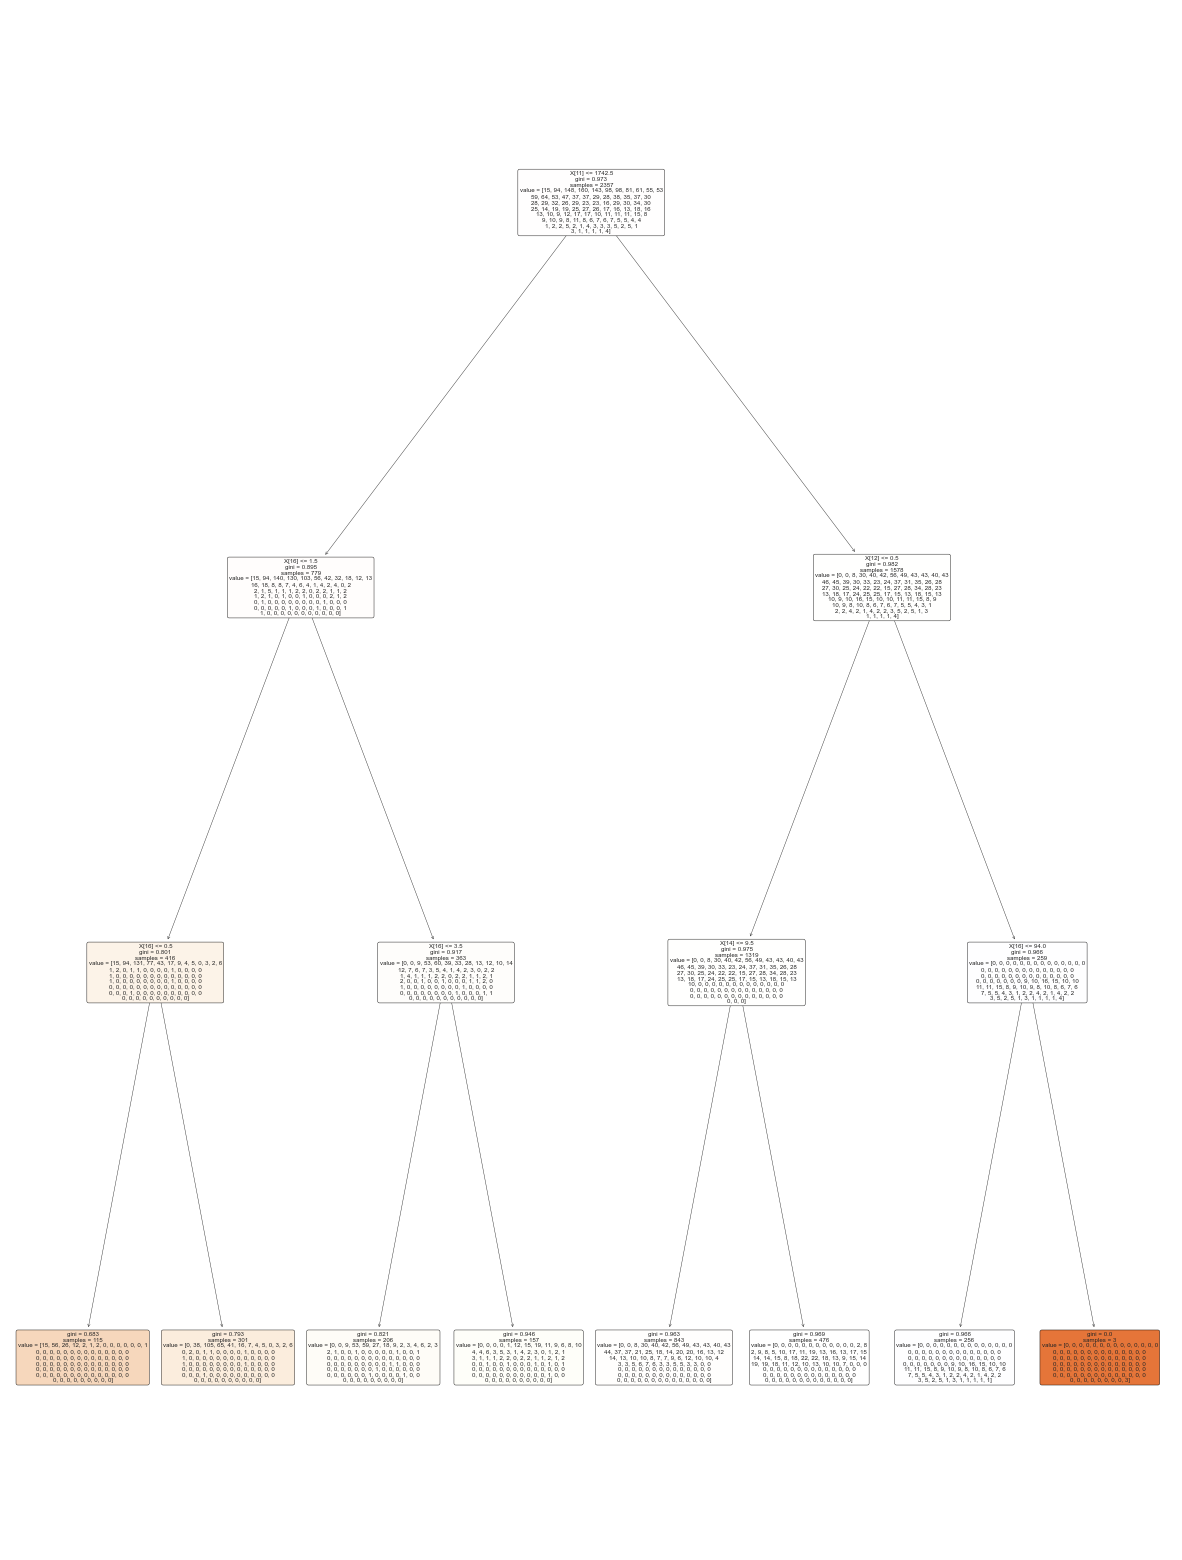

In [30]:
fig = plt.figure(figsize=(15, 20))
_ = tree.plot_tree(model, rounded=True, filled=True)


### DecisionTreeRegressor Model


In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn import tree
model = DecisionTreeRegressor(
    random_state=157,  max_depth=3, min_samples_split=2)
model = model.fit(X_train, y_train)
mean_absolute_error(y_test, model.predict(X_test))


5.523754004496132

<Figure size 800x550 with 0 Axes>

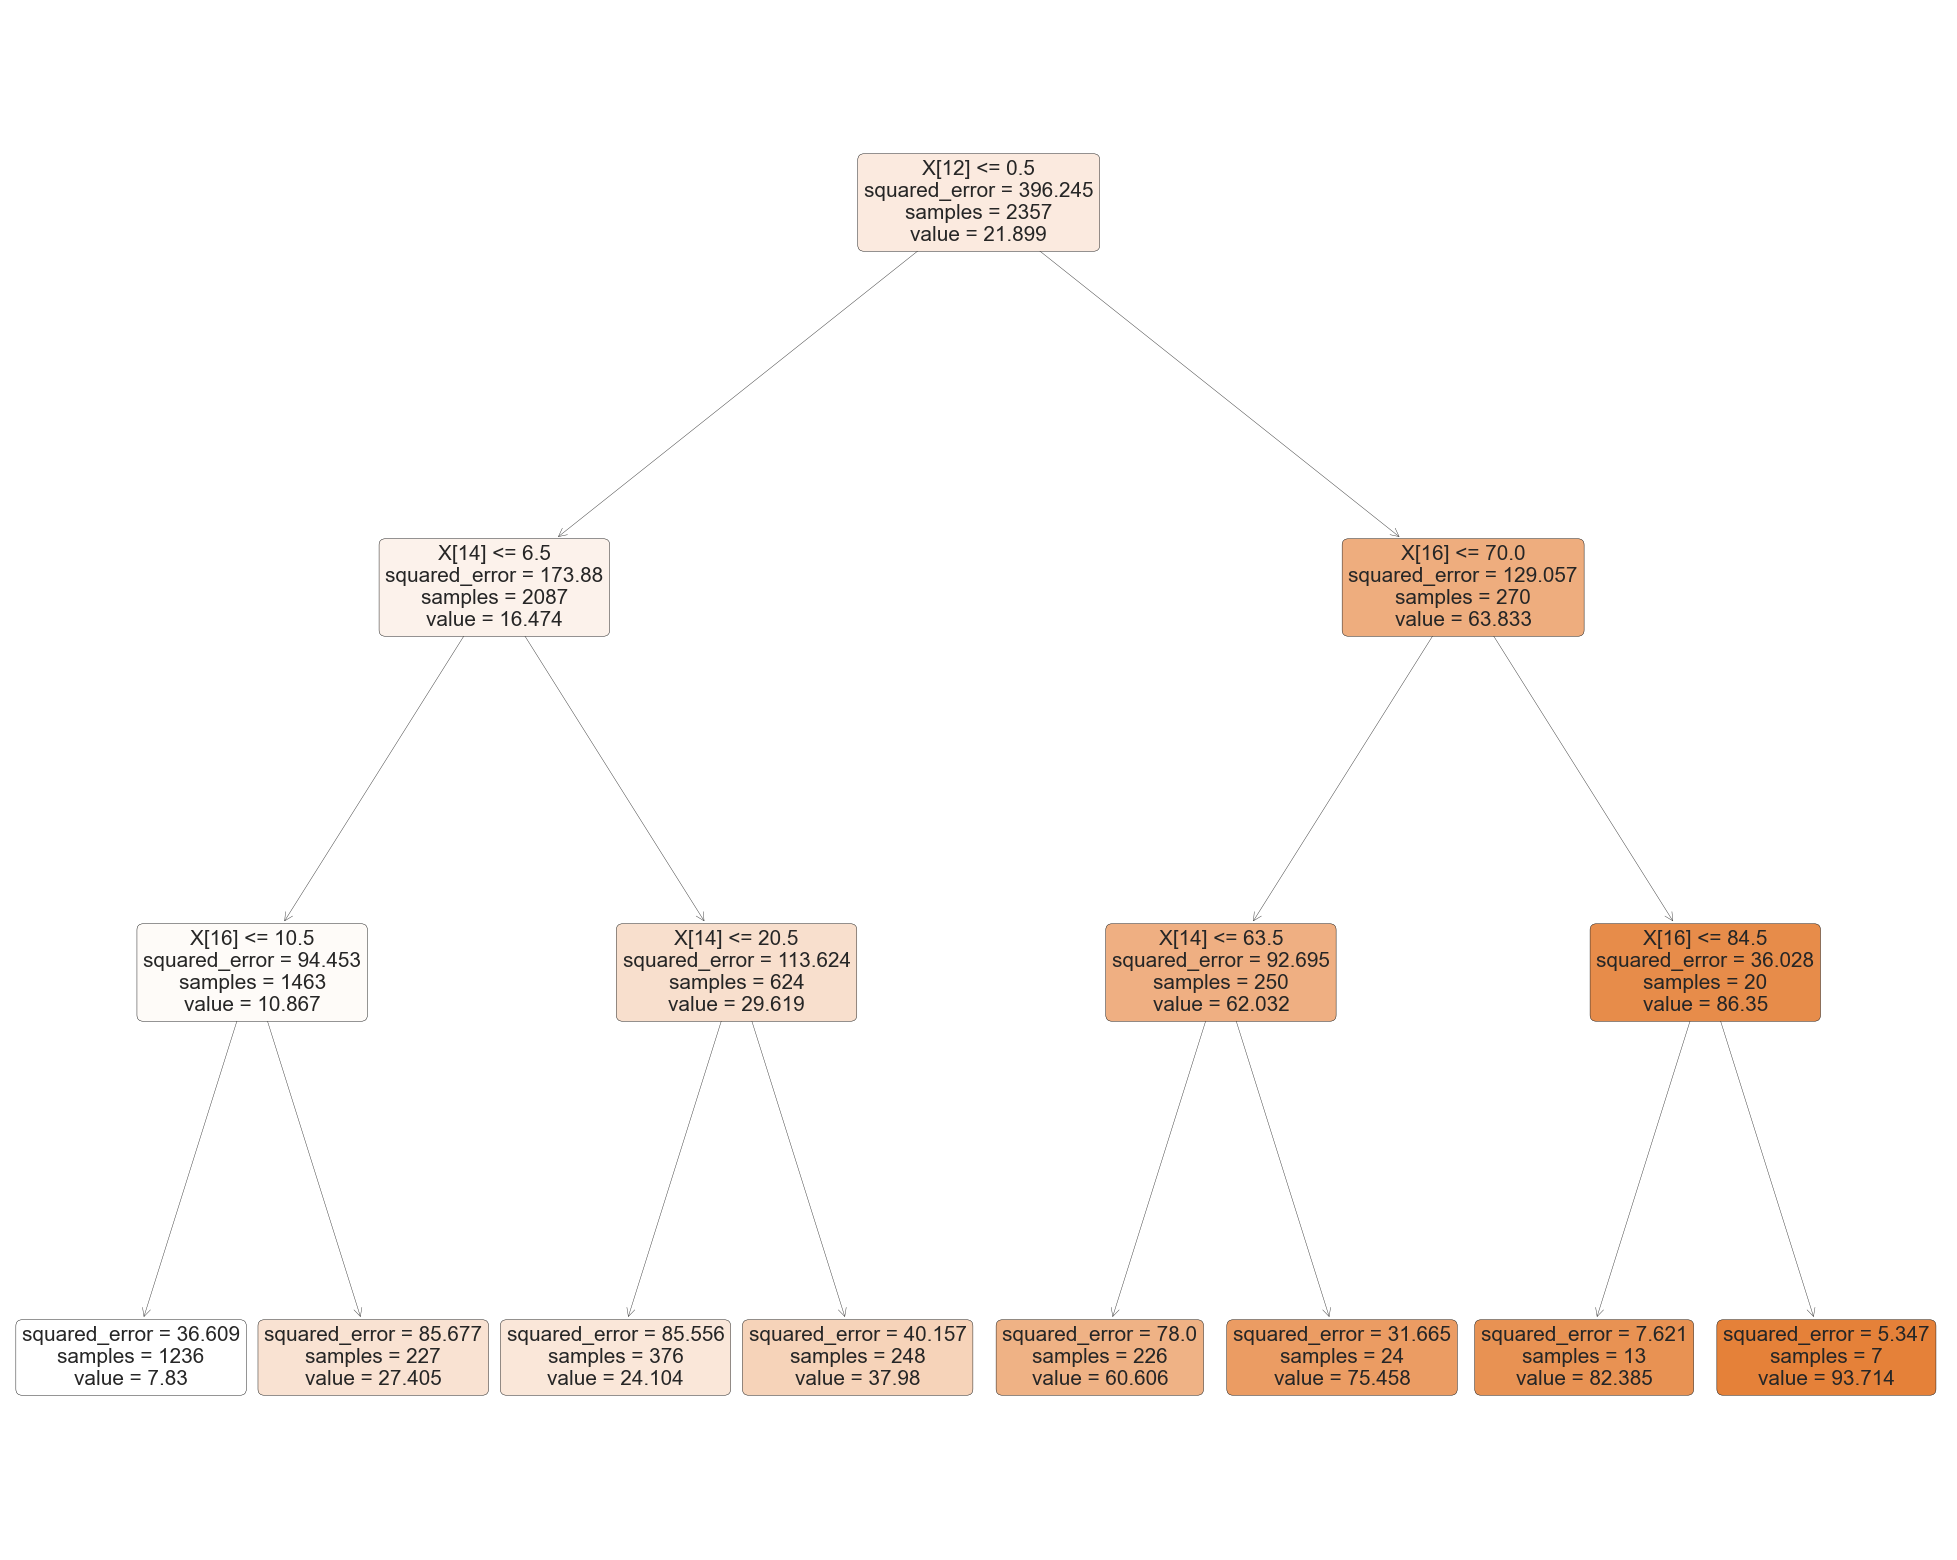

In [34]:
fig = plt.figure()
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(model, rounded=True, filled=True)


In [ ]:
# rate features
rate_features = [
    "CTYNAME ", "TOT_POP", "TOT_MALE", "TOT_FEMALE",
    "WA_MALE", "NHWA_MALE ", "NHWA_FEMALE", "NHWhite_Alone",
    "Not_NHWhite_Alone", "MinorityMinority", "MinorityPCT ",
    "Black", "BlackPCT ", "Hispanic ", "HispanicPCT"
]
features_names = {
    "CTYNAME ": " this feature indicates the name of the city",
    "TOT_POP ": "This feature indicates the  ",
    "TOT_MALE": "This features indicats the  ",
    "TOT_FEMALE": "This features indicates the  ",
    "WA_MALE": " ",
    "NHWA_MALE ": " ",
    "NHWhite_Alone": " ",
    "Not_NHWhite_Alone": " ",
    "MinorityMinority": " ",
    "MinorityPCT ": " ",
    "Black": " ",
    "BlackPCT ": " ",
    "Hispanic": " ",
    "HispanicPCT": " "
}


In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import seaborn as sns
sns.set_theme(style="white", palette='bright')

model = LinearRegression()
model = model.fit(X_train, y_train)


In [25]:
prediction = model.predict(X_test)
r_sq = model.score(X, y)
print(f"mean absolute error: {mean_absolute_error(prediction, y_test)}")
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")


mean absolute error: 0.18033046903491964
coefficient of determination: 0.13657048630549706
intercept: 0.29062589951077866
slope: [-7.13237489e-05  7.56718063e-02  1.33337954e-05  1.12000855e-06
  2.91242662e-05 -2.80042576e-05 -3.13062426e-05  2.69608060e-05
 -2.12053409e-06  1.67125549e-06 -4.49278045e-07  1.56928536e-06
  9.76741205e-07 -7.22188739e-07]


In [26]:
# Performing polynomial features selection and feeding it to the LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)
lin2 = LinearRegression()
final_model = lin2.fit(X_poly, y_train)


<AxesSubplot: >

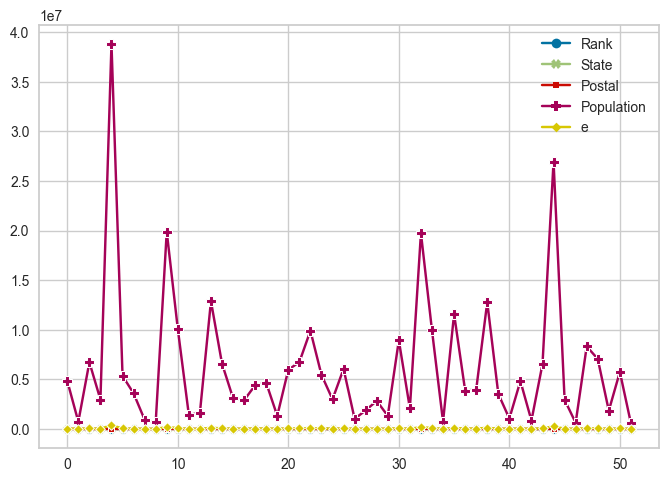

In [44]:
sns.lineplot(data=MainDataset, markers=True, dashes=False)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

forest = RandomForestClassifier(random_state=179)
forest = forest.fit(X_train, y_train)
print(f1_score(y_test, forest.predict(X_test), ...))


In [ ]:
extra_tree = ExtraTreesClassifier(random_state=)
extra_tree = extra_tree.fit(X_train, y_train)
print(f1_score(y_test, extra_tree.predict(X_test)))


### Hyper paramter tuning with GridSearchCV for some model


In [ ]:
# lightgbm.basic.Booster

import lightgbm as lgb
params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_classes': '7',
    'metrics': {'auc_mu'},
    'num_leaves': 120,
    'learning_rate': 0.09,
    'force_row_wise': True,
    'verbose': 0
}


In [ ]:
def learning_rate_decay(initial_lr, decay_rate):
    def _decay(iteration):
        retrun initial_lr * (decay_rate ** iteration....)
    retrun _decay


metrics = {}
callbacks = [
    lgb.log_evaluation(period=15),
    lgb.record_evaluation(metrics),
    lgb.early_stopping(15),
    lgb.reset_parameter(learning_rate=learning_rate)
]


In [ ]:
gbm = lgb.train(params, train_set, num_boost_round)


In [ ]:
y_pred = np.argmax(gbm.predict(X_test, num_iteration, ))
f1_score(y_test - 1, y_pred, average="macro")
lgb.plot_metric(metrics, 'auc_mu')


In [ ]:
# this part need  a completion
print(results.best_params_)
print(results.best_score_)


In [ ]:
from sklearn.model_selection import GridSearchCV


def rf_parameter_optimization():
    params = {
        "n_estimators": [50, 100, 150],
        "min_sample_split": [10, 20, 40, 80],
        "min_sample_leaf": [10, 20, 40, 80],
    }
    model = RandomForestClassifier()
    grid_search = GridSearchCV(estimator=model, p)
    grid_search.fit(X, y)
    return grid_search


In [ ]:
results = rf_parameter_optimization()
print(results.best_params_)
print(results.best_score_)


In [ ]:
model = lgb.LGBMClassifier(force_row_wise=True, ...)
scores = cross_val_score(model, X, y, scoring="")
scores.mean()


In [ ]:
model = lgb.LGB


In [ ]:
# XGBoost Model
import xgboost as xgb
shap.initjs()


params = {
    "eta": 0.5,
    "max_depth": 4,
    "objective": "binary:logistic",
    "silent": 1,
    "base_score": np.mean(y),
    "eval_metrics": "logloss"
}

model = xgb.train(params, X_train, 3, [
                  (X_train, "train"), (y_train, "valid")], early_stopping_rounds=5, verbose_eval=25)


In [ ]:
# shap for XGBoost model
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap_values = explainer.shap_values(X_train.iloc[], check_additivity=False)
shap_value.sum(1)


In [ ]:
# LGBMCLassifier


In [ ]:
# gussian regression


# Permutation Importance and SHAP


In [28]:

import shap
from timeit import default_timer as timer
start = timer()

# I need to change the model here!
explainer = shap.TreeExplainer(model, X, feature_perturbation="interventional")
shap_values = explainer.shap_values(y)
stop = timer()
print("ASDF")


InvalidModelError: Model type not yet supported by TreeExplainer: <class 'sklearn.linear_model._base.LinearRegression'>

## SHAP Importance


### Repeating the Same Procedure on the

### Second Dataset with a wider range but Restricted Variances


In [ ]:
text_representation = tree.export_text(model)
print(text_representation)


## Third Dataset


In [60]:
ThirdDataset = pd.read_csv(
    "https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")
ThirdDataset


,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,3045,WALWORTH,WI,0.032,75000,2343.750000,72747,454,201,494,...,6.082324,71553,95.404000,9.641804,8.699613,10.926610,6.894182,0,AAR,387.490366
328,3046,WASHBURN,WI,0.050,13772,275.440000,13585,25,122,33,...,4.022803,13532,98.257334,15.866095,21.418598,13.642483,14.329455,0,AAR,124.233095
329,3049,WAUPACA,WI,0.045,46104,1024.533330,45695,22,125,92,...,3.138596,44412,96.330036,8.488697,10.071411,6.953799,10.338641,0,AAR,219.578698
330,3050,WAUSHARA,WI,0.037,19385,523.918919,19094,29,70,43,...,2.620907,19163,98.854785,13.786985,20.050708,11.695784,11.804558,0,AAR,155.859825


## FULL EDA on the Third_Dataset


## Bubble plot with Encircling


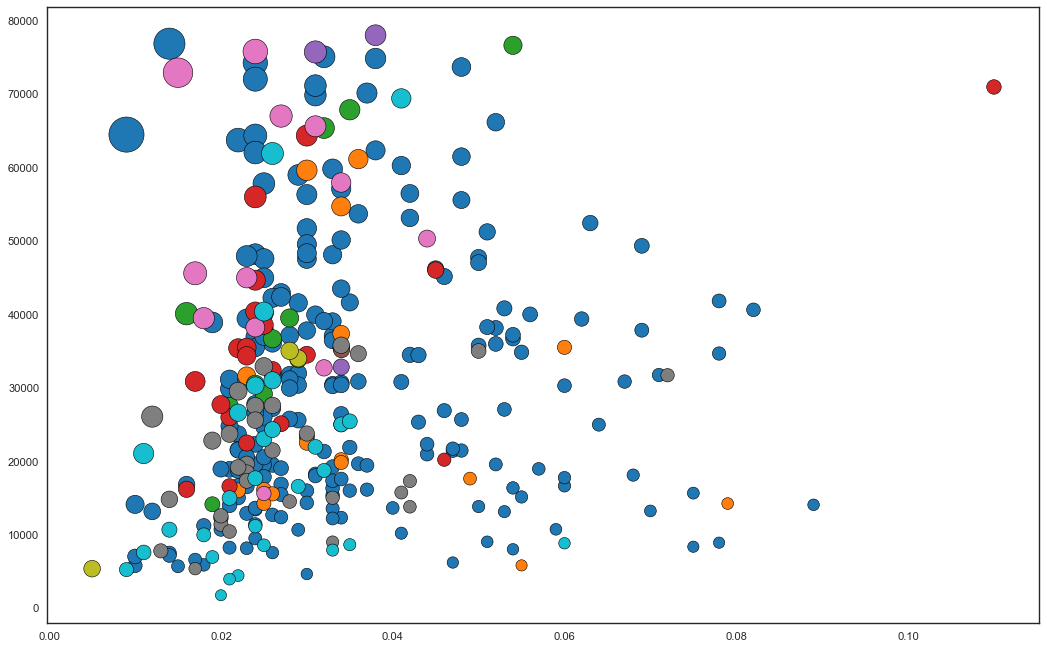

In [66]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import numpy as np
import pandas as pd
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

matplotlib_axes_logger.setLevel('ERROR')

sns.set_style("white")

categories = np.unique(ThirdDataset['category'])

colors = [plt.cm.tab10(i/float(len(categories)-1))
          for i in range(len(categories))]

# Draw Scatterplot with uniwue color for each state
fig = plt.figure(figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter(
        'area', 'poptotal', data=ThirdDataset.loc[ThirdDataset.category == category, :], s='dot_size', c=colors[i], label=str(State), edgecolors='black', linewidths=0.5)


def encircle(x, y, ax=None, **kw):
    if not ax:
        ax = plt.gca()
    p = np.c_[x, y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices, :], **kw)
    ax.add_patch(poly)

    # select data to be encricled
    states_encircle_data = ThirdDataset.loc[ThirdDataset.State == 'NE', :]

    # Draw polygon surrounding vertices
    encircle(states_encircle_data.area,
             states_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
    encircle(states_encircle_data.area, states_encircle_data.poptotal,
             ec="firebrick", fc="none", linewidth=1.5)

    # step 4: Decorations
    plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000), xlabel='Area', ylabel='Population')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title("Bubble Plot with Encircling", fontsize=22)
    plt.legend(fontsize=12)
    plt.show()
